Se requiere de un modelo que proponga un valor de cantidad de unidades de compra para cada producto. Deberás tener en cuenta que es tan importante poder encontrar el modelo como también explicar como lograste obtenerlo.

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
sns.set()

In [9]:
from IPython.display import clear_output

In [10]:
df_compra = pd.read_csv("Compra.csv", sep=",", parse_dates=["Fecha"])

In [11]:
df_compra.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11539 entries, 0 to 11538
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   IdCompra       11539 non-null  int64         
 1   Fecha          11539 non-null  datetime64[ns]
 2   Fecha_Año      11539 non-null  int64         
 3   Fecha_Mes      11539 non-null  int64         
 4   Fecha_Periodo  11539 non-null  int64         
 5   IdProducto     11539 non-null  int64         
 6   Cantidad       11539 non-null  int64         
 7   Precio         11172 non-null  float64       
 8   IdProveedor    11539 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(7)
memory usage: 811.5 KB


In [12]:
df_compra.shape

(11539, 9)

Nos quedamos con los campos que vamos a utilizar

In [13]:
df_compra = df_compra[['Fecha','IdProducto','Cantidad','Fecha_Año','Fecha_Mes','Fecha_Periodo']]

In [14]:
df_compra.sort_values(['IdProducto','Fecha'], inplace = True)

In [15]:
df_compra.reset_index(inplace = True, drop  = True)
df_compra.head()

,Fecha,IdProducto,Cantidad,Fecha_Año,Fecha_Mes,Fecha_Periodo
0,2015-01-30,42737,2,2015,1,201501
1,2015-05-29,42737,8,2015,5,201505
2,2015-06-26,42737,9,2015,6,201506
3,2015-07-31,42737,5,2015,7,201507
4,2015-08-28,42737,10,2015,8,201508


Visualizamos el comportamiento de los datos de un único producto aleatorio

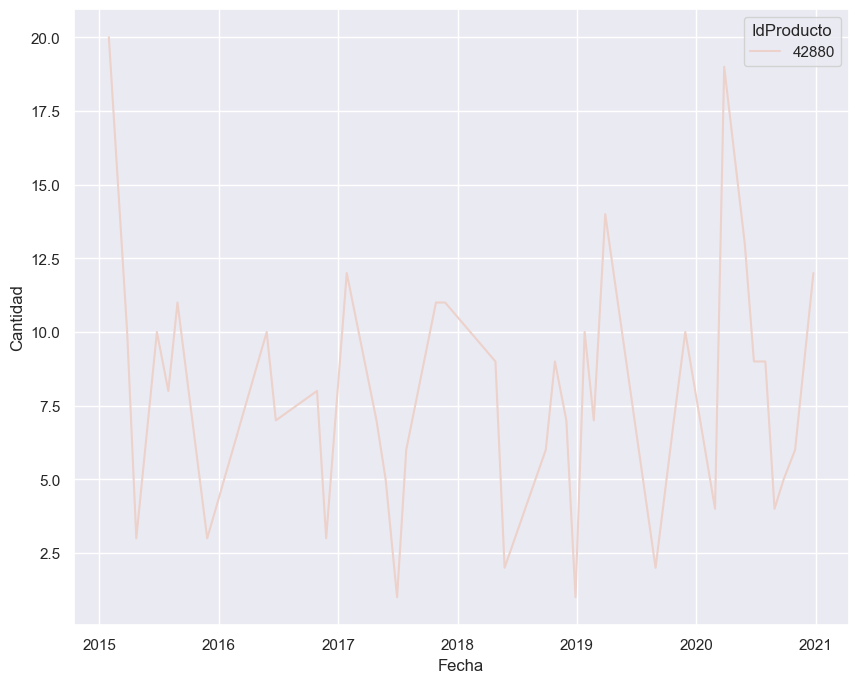

In [16]:
plt.figure(figsize = (10,8))
sns.lineplot(x = 'Fecha', y = 'Cantidad', data = df_compra[df_compra.IdProducto == 42880], hue = 'IdProducto')
plt.show()

Convertimos el campos Fecha a un valor numérico para utilizarlo como input al modelo de regresión

In [17]:
import datetime as dt
df_compra['Fecha_Numerico']=df_compra['Fecha'].map(dt.datetime.toordinal)
df_compra.head()

,Fecha,IdProducto,Cantidad,Fecha_Año,Fecha_Mes,Fecha_Periodo,Fecha_Numerico
0,2015-01-30,42737,2,2015,1,201501,735628
1,2015-05-29,42737,8,2015,5,201505,735747
2,2015-06-26,42737,9,2015,6,201506,735775
3,2015-07-31,42737,5,2015,7,201507,735810
4,2015-08-28,42737,10,2015,8,201508,735838


In [18]:
x = df_compra[(df_compra.IdProducto == 42880) & (df_compra.Fecha_Año == 2020)].Fecha_Numerico
y = df_compra[(df_compra.IdProducto == 42880) & (df_compra.Fecha_Año == 2020)].Cantidad

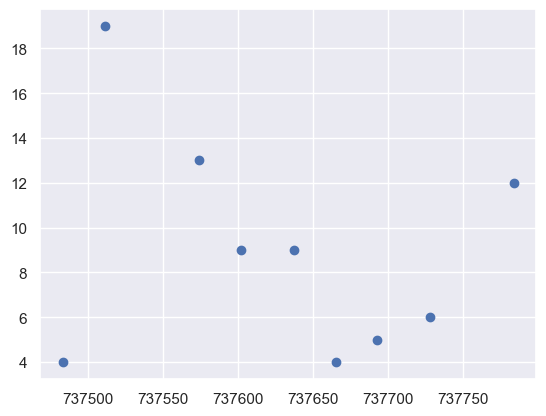

In [19]:
# Ploteamos
plt.scatter(x, y)
plt.show()

In [20]:
df_compra[(df_compra.IdProducto == 42880)][['Fecha_Numerico','Cantidad']].corr()

,Fecha_Numerico,Cantidad
Fecha_Numerico,1.000000,-0.039009
Cantidad,-0.039009,1.000000


In [21]:
df_compra[(df_compra.IdProducto == 42880) & (df_compra.Fecha_Año >= 2020)][['Fecha_Numerico','Cantidad']].corr()

,Fecha_Numerico,Cantidad
Fecha_Numerico,1.000000,-0.237111
Cantidad,-0.237111,1.000000


In [22]:
from sklearn.linear_model import LinearRegression

La separación entre los datos de entrenamiento y prueba, lo hacemos en base a períodos

In [23]:
X_train = df_compra[(df_compra.IdProducto == 42880) & (df_compra.Fecha_Periodo >= 201901) & (df_compra.Fecha_Periodo < 202008)].Fecha_Numerico.values
y_train = df_compra[(df_compra.IdProducto == 42880) & (df_compra.Fecha_Periodo >= 201901) & (df_compra.Fecha_Periodo < 202008)].Cantidad.values
X_test = df_compra[(df_compra.IdProducto == 42880) & (df_compra.Fecha_Periodo >= 202008)].Fecha_Numerico.values
y_test = df_compra[(df_compra.IdProducto == 42880) & (df_compra.Fecha_Periodo >= 202008)].Cantidad.values

In [24]:
X_train = X_train.reshape(-1,1)
X_test = X_test.reshape(-1,1)

In [25]:
#from sklearn.model_selection import train_test_split
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [26]:
modelo = LinearRegression(fit_intercept=True)

In [27]:
modelo.fit(X_train, y_train)

LinearRegression()

In [28]:
modelo.coef_

array([0.00310931])

Evaluamos el error

In [29]:
from sklearn.metrics import mean_squared_error
y_train_pred = modelo.predict(X_train)
y_test_pred = modelo.predict(X_test)
print('Error en datos de train:', mean_squared_error(y_train, y_train_pred))
print('Error en datos de test:', mean_squared_error(y_test, y_test_pred))

Error en datos de train: 19.895193920154927
Error en datos de test: 22.934573428342098


In [30]:
from sklearn.metrics import r2_score

In [31]:
r2 = r2_score(y_test, y_test_pred)

In [32]:
print('El coeficiente de determinación del regresor es:', r2)

El coeficiente de determinación del regresor es: -1.3674398377643455


Graficamos

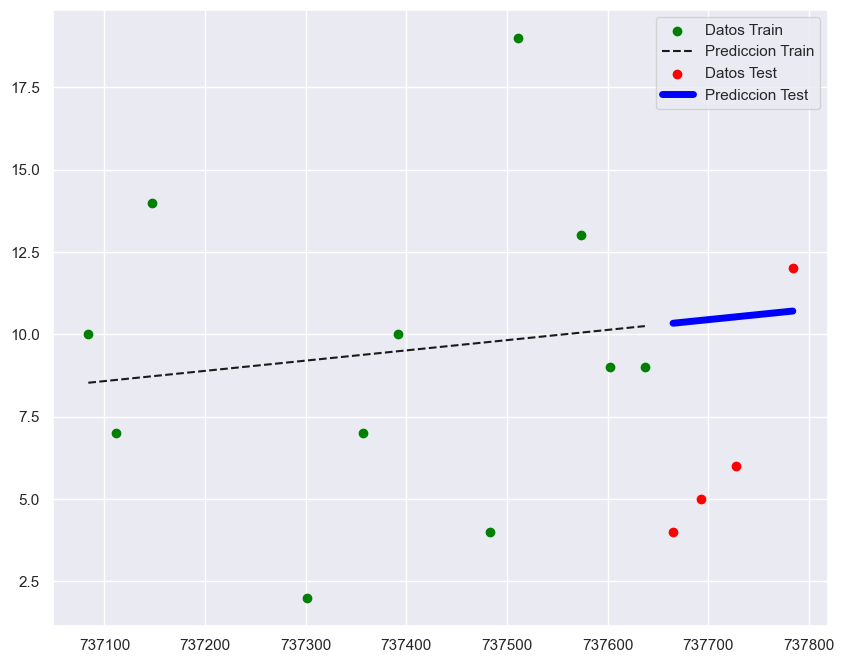

In [33]:
plt.figure(figsize = (10,8))

plt.scatter(X_train, y_train,  color='green', label = 'Datos Train')
plt.plot(X_train, y_train_pred, color='k', linestyle = '--', label = 'Prediccion Train')

plt.scatter(X_test, y_test,  color='red', label = 'Datos Test')
plt.plot(X_test, y_test_pred, color='blue', linewidth=5.0, label = 'Prediccion Test')

plt.legend()
plt.show()

Establecemos una fecha real para la cual queremos hacer la predicción y usamos el modelo

In [34]:
from datetime import datetime
fecha_prediccion = '2021-01-01'

In [35]:
fecha_prediccion = datetime.strptime(fecha_prediccion, '%Y-%m-%d').date()

In [36]:
fecha_prediccion = fecha_prediccion.toordinal()
#fecha_prediccion = datetime.fromordinal(fecha_prediccion)

In [37]:
fecha_prediccion = np.array(fecha_prediccion)

In [38]:
fecha_prediccion = fecha_prediccion.reshape(-1,1)

In [39]:
cantidad_prediccion = modelo.predict(fecha_prediccion)

In [40]:
print('La cantidad que se predice es :' + str(round(cantidad_prediccion[0],2)))

La cantidad que se predice es :10.73
